<div style="background-color: #FFDD00; padding: 20px; border-radius: 20px; display: flex; align-items: center; justify-content: center; border: 7px solid black;">
    <a href="https://www.flaticon.es/icono-gratis/feliz_10477524?related_id=10477524" target="_blank">
        <img src="https://cdn-icons-png.flaticon.com/512/10477/10477524.png" alt="Icono de carita feliz" style="width: 100px; height: 100px; margin-right: 20px;">
    </a>
    <p style="font-size: 24px; font-family: Arial, sans-serif; font-weight: bold; color: black; text-shadow: 1px 1px 2px black; margin: 0;">
        World Happiness Report
    </p>
</div>



This notebook has the purpose of extending the metrics on the model obtained previously.

---

Set your work directory, be sure of have you own file (`.env`) with your environment variables, in this case 'WORK_DIR' 

In [1]:
# Work directory setup
# ======================================================================
import sys
import os

work_dir = os.getenv("WORK_DIR")

sys.path.append(work_dir)

Import the neccesary libreries and modules

In [2]:
# Modules
# ======================================================================

from utils.years_functions import *
from src.database.database_functions import get_engine, create_session, query_table
from src.models.database_models import Model

# Metrics
# ======================================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Libreries
# ======================================================================
import matplotlib.pyplot as plt
import seaborn as sns

Connect to database and create a session

In [3]:
connection = get_engine()
session = create_session(connection)

INFO:root:Conected successfully to database!
INFO:root:Session created successfully.


Bring the table loaded previusly as a DataFrame

In [4]:
df = query_table(Model, connection, session)

INFO:root:Data queried successfully.


Real value and predicted value

In [5]:
y_true = df['Happiness_Score']
y_pred = df['Predicted_Happiness_Score']

Metrics about the model

In [6]:
print('Gradient Boosting Regressor Performance Metrics:')

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


Gradient Boosting Regressor Performance Metrics:
MAE: 0.3046025107450008
MSE: 0.16623420751686627
R²: 0.877511200616532


Real value vs. predicted value graphs

- True vs Predicted Values scatter plots

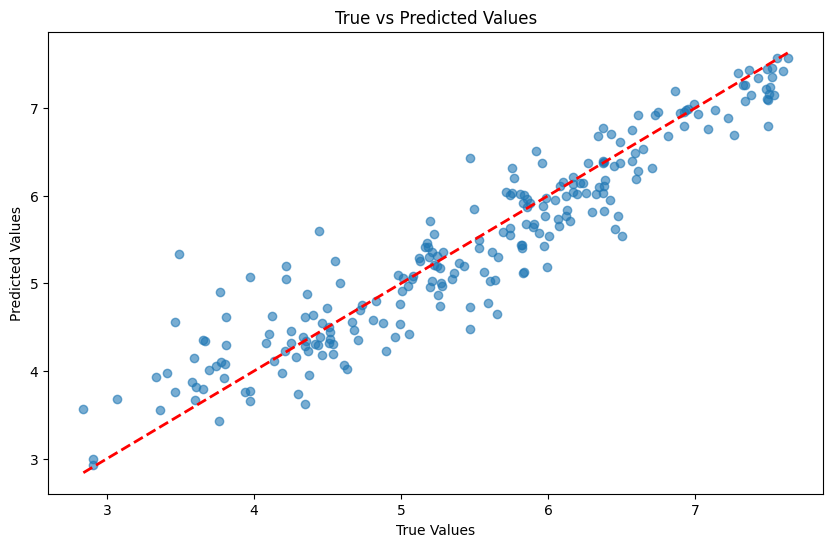

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

- Distribution of Residuals

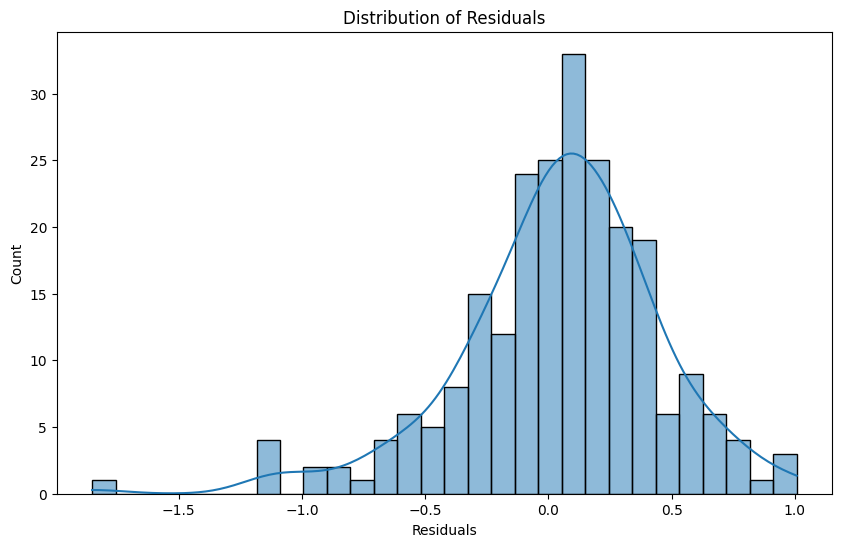

In [8]:
plt.figure(figsize=(10, 6))
residuals = y_true - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

- Real values vs. predicted values plot

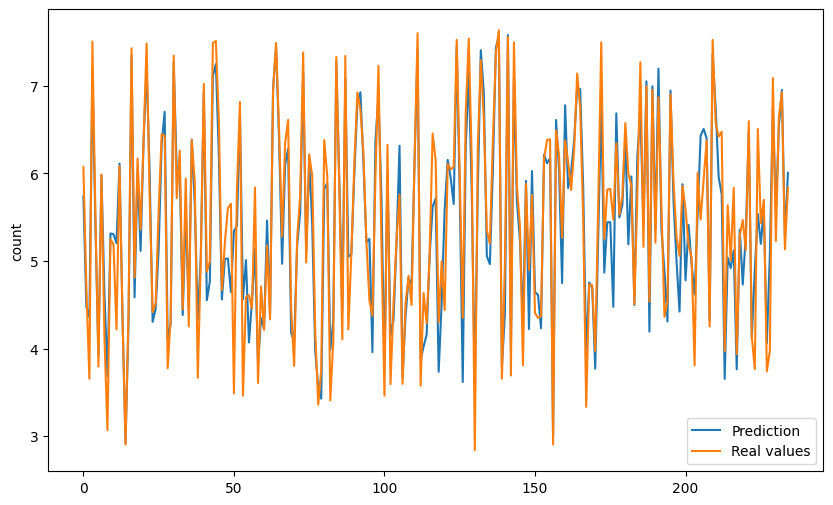

In [9]:
plt.figure(figsize = (10,6))

plt.plot(y_pred, label='Prediction')
plt.plot(y_true.values, label='Real values')
plt.ylabel('count')
plt.legend()
plt.show()